In [1]:
import torch
import os
from dataset import DatasetLoader
from generator_model import Generator
from torch.utils.data import DataLoader
from utils.config import load_checkpoint, CHECKPOINT_GEN, save_some_examples

import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

# Select device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
# Load the trained generator model
gen = Generator(in_channels=1).to(device)
load_checkpoint(CHECKPOINT_GEN, gen, None, 0, device=device)  # No optimizer needed

# Load the test dataset
test_dataset = DatasetLoader(img_dir="./Dataset", img_size=(512, 512))
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0)  # num_workers=0 avoids Windows issues

# Generate and save results
save_some_examples(gen, test_loader, epoch="test", folder="examples")
print("Generated images saved in 'examples' folder.")

Loading checkpoint from ./checkpoints/gen_checkpoint.pth...
Saving example images at epoch test...
Generated images saved in 'examples' folder.


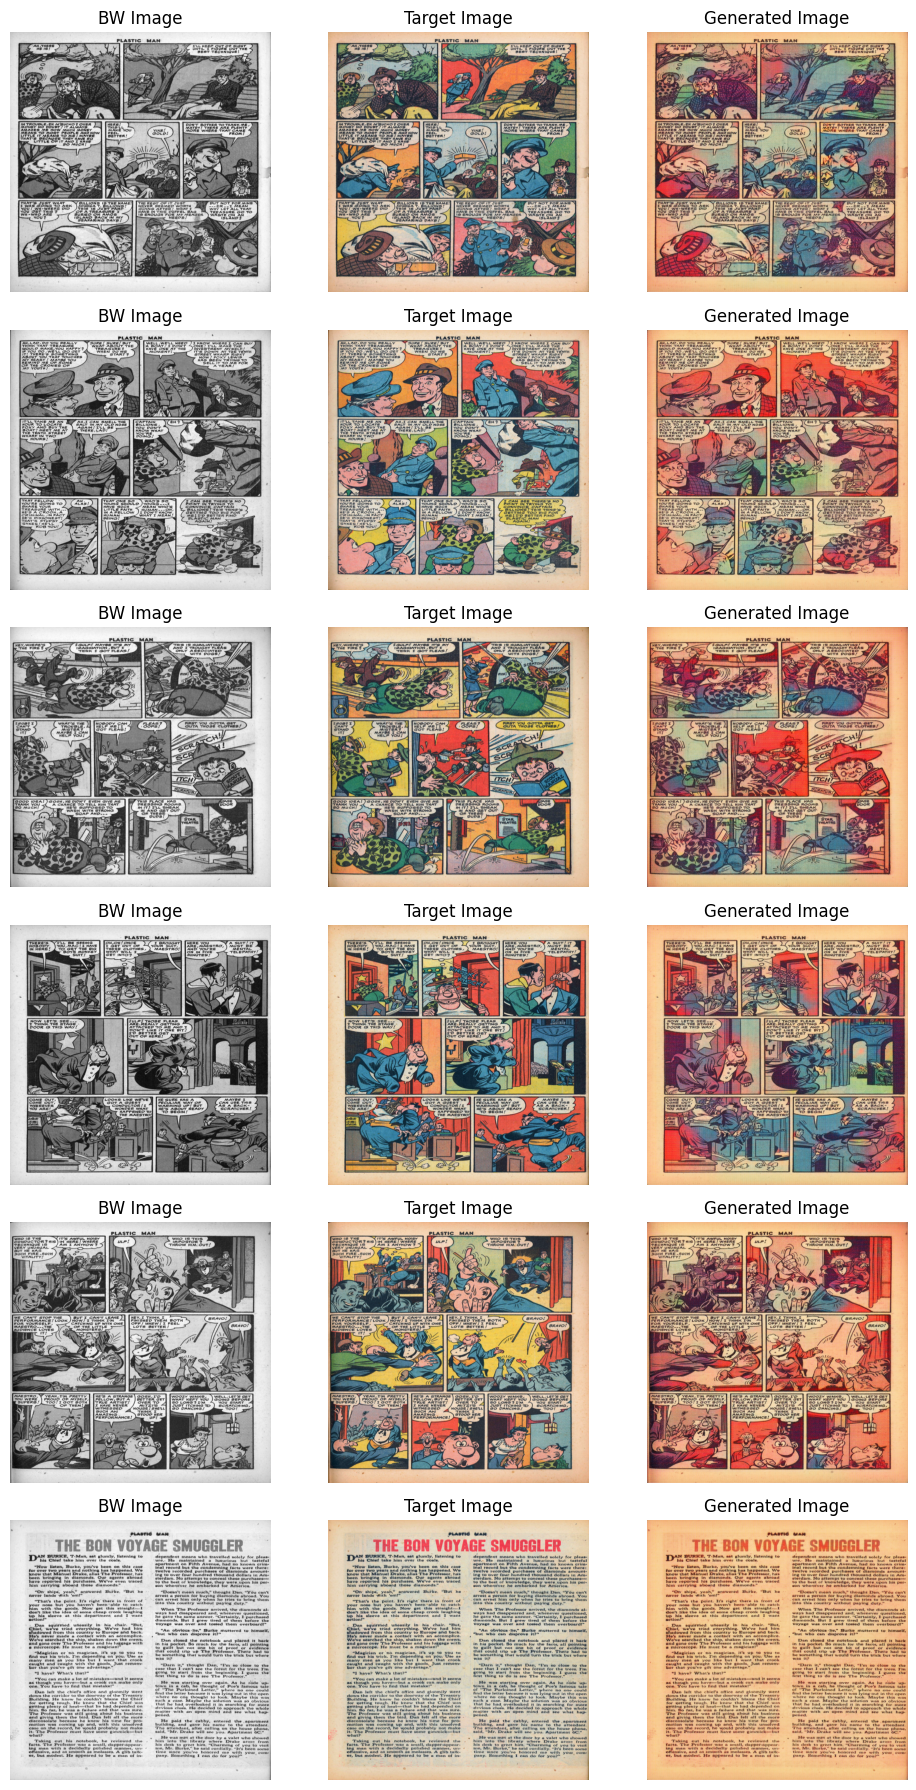

In [4]:

# Load generated images
image_folder = './examples'
bw_images = sorted([f for f in os.listdir(image_folder) if f.startswith('bw_image')])
target_images = sorted([f for f in os.listdir(image_folder) if f.startswith('target_image')])
fake_images = sorted([f for f in os.listdir(image_folder) if f.startswith('fake_image')])

num_images = min(6, len(bw_images), len(target_images), len(fake_images))

# Set up the figure size
fig, axes = plt.subplots(num_images, 3, figsize=(10, 3 * num_images))

for i in range(num_images):
    bw_img = Image.open(os.path.join(image_folder, bw_images[i]))
    target_img = Image.open(os.path.join(image_folder, target_images[i]))
    fake_img = Image.open(os.path.join(image_folder, fake_images[i]))

    axes[i, 0].imshow(bw_img)
    axes[i, 0].axis('off')
    axes[i, 0].set_title("BW Image")

    axes[i, 1].imshow(target_img)
    axes[i, 1].axis('off')
    axes[i, 1].set_title("Target Image")

    axes[i, 2].imshow(fake_img)
    axes[i, 2].axis('off')
    axes[i, 2].set_title("Generated Image")

plt.tight_layout()
plt.show()